In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

# Load and inspect the dataset
file_path = 'DFW College Project v2.xlsx'
df = pd.read_excel(file_path)
print("Dataset shape:", df.shape)
print("Column names:", df.columns)
print(df.head())

Dataset shape: (90, 42)
Column names: Index(['year', 'school', 'admit_rate', 'enroll_rate', 'totalEnroll',
       'undergrad', 'grad', 'bs', 'ms', 'phd', 'faculty', 'StF', 'pell(e)',
       'transfers', 'latin', 'white', 'black', 'nurse', 'biz', 'STEM', 'arts',
       'largeClass', 'smallClass', 'tuition', 'greek', 'H2g', 'pellFull(h)',
       'package (k)', '6year', '4year', 'gradRate', 'badMath', 'hsTop',
       'hsBot', 'verbal25', 'verbal75', 'math25', 'math75', 'crimes', 'vawa',
       'arrests', 'unfounded'],
      dtype='object')
   year school  admit_rate  enroll_rate  totalEnroll  undergrad  grad    bs  \
0  2014    UNT    0.621447     0.124147        36164      29723  6441  6444   
1  2015    UNT    0.700855     0.154187        37175      30503  6672  6519   
2  2016    UNT    0.715916     0.283728        37979      31209  6770  6539   
3  2017    UNT    0.723201     0.264750        38101      31405  6696  7048   
4  2018    UNT    0.712666     0.242346        38087      3134

In [64]:
#Find the proportion of missing values to total col. values

missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages = missing_percentages.round(2)
non_zero_missing = missing_percentages[missing_percentages > 0]
print("Missing values (%):\n", non_zero_missing)

Missing values (%):
 transfers     1.11
tuition       2.22
greek         5.56
badMath       6.67
hsTop         4.44
hsBot         4.44
verbal25      3.33
verbal75      3.33
math25        3.33
math75        3.33
crimes       70.00
vawa         70.00
arrests      70.00
unfounded    73.33
dtype: float64


In [66]:
# Missing Numerical Columns

# Normal Distribution: mean
df['transfers'] = df['transfers'].fillna(df['transfers'].mean())

#Skewed: median
df['tuition'] = df['tuition'].fillna(df['tuition'].median())
df['badMath'] = df['badMath'].fillna(df['badMath'].median())
df['hsTop'] = df['hsTop'].fillna(df['hsTop'].median())
df['hsBot'] = df['hsBot'].fillna(df['hsBot'].median())
df['greek'] = df['greek'].fillna(df['greek'].median())

# Score Columns: median
score_cols = ['verbal25', 'verbal75', 'math25', 'math75']
for col in score_cols:
    df[col] = df[col].fillna(df[col].median())

# Columns w/ > 50% missing values: drop
df = df.drop(['crimes', 'vawa', 'arrests', 'unfounded'], axis=1)

# Verify there aren't any missing values
missing_percentages_after = (df.isnull().sum() / len(df)) * 100
non_zero_missing_after = missing_percentages_after[missing_percentages_after > 0]

# Display results
if not non_zero_missing_after.empty :
    print("Columns with non-zero missing values after handling:")
    print(non_zero_missing_after)
else:
    print("All missing values have been handled.")
    
# Save updated dataset
clean_df = df
df.to_csv('cleanDFWcollegeProject.csv', index=False)

All missing values have been handled.


In [68]:
# Data Statistic Summary

print("Summary statistics:\n", df.describe())
print("Categorical column unique counts:\n", df.select_dtypes('object').nunique())

Summary statistics:
               year  admit_rate  enroll_rate   totalEnroll     undergrad  \
count    90.000000   90.000000    90.000000     90.000000     90.000000   
mean   2018.500000    0.555571     0.157128  24757.433333  18685.266667   
std       2.888373    0.232512     0.072340  14821.788674  12330.715389   
min    2014.000000    0.078786     0.035589   6621.000000   3893.000000   
25%    2016.000000    0.404634     0.105518  11828.500000   8923.250000   
50%    2018.500000    0.544873     0.152524  17625.000000  14308.000000   
75%    2021.000000    0.721380     0.223825  38060.000000  31312.500000   
max    2023.000000    0.948149     0.294292  53082.000000  42444.000000   

               grad            bs           ms          phd      faculty  ...  \
count     90.000000     90.000000    90.000000    90.000000    90.000000  ...   
mean    6072.166667   4215.200000  1750.266667   402.133333  1498.877778  ...   
std     3018.617085   2903.417839   968.346045   349.208807 

<Figure size 640x480 with 0 Axes>

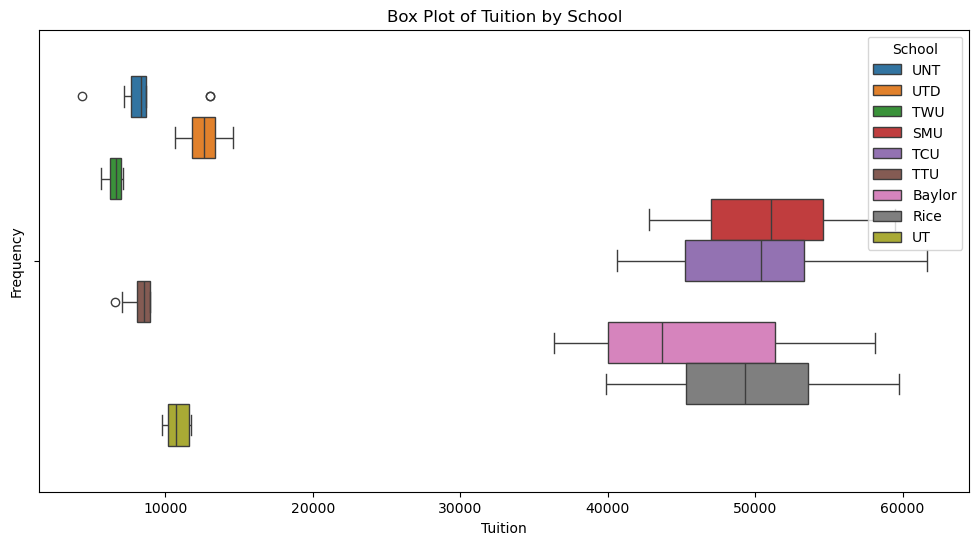

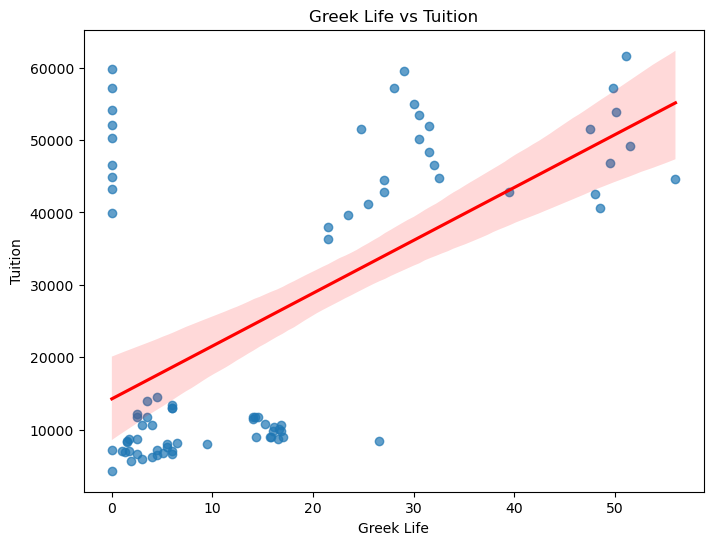

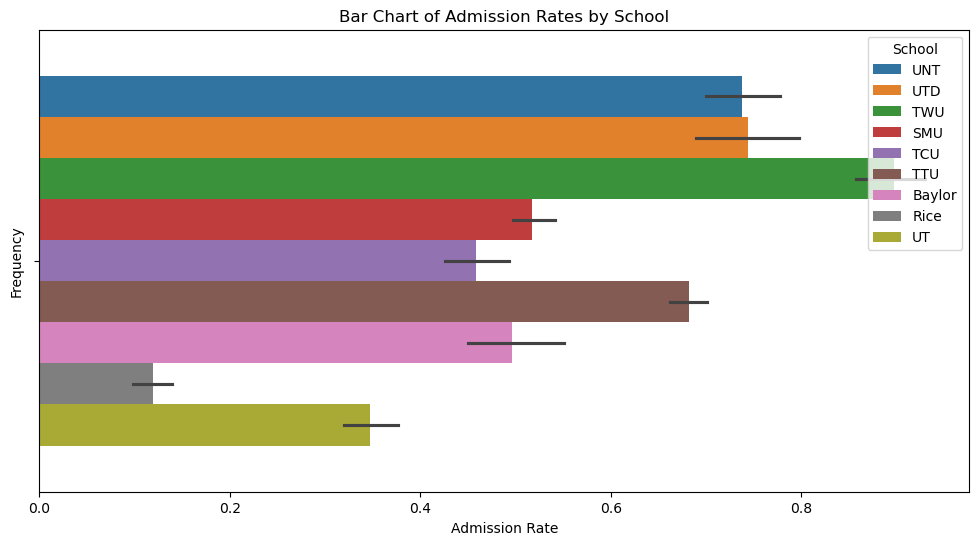

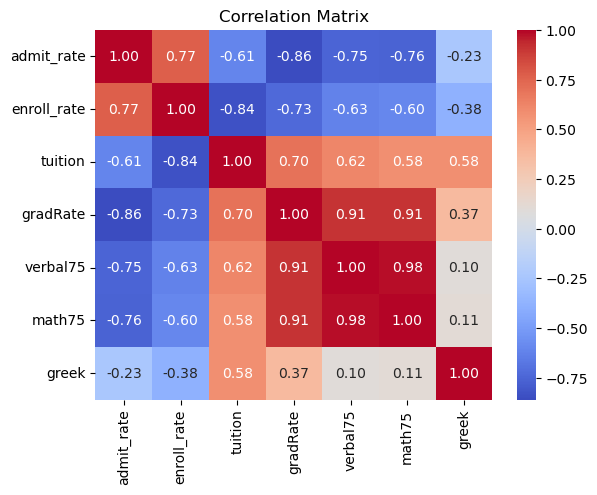

In [354]:
# Adjustments to prevent over
plt.tight_layout()
plt.show()

# Box Plot: Distribution of Tuition
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df, x='tuition', hue='school',  palette='tab10')
plt.title('Box Plot of Tuition by School')
plt.xlabel('Tuition')
plt.ylabel('Frequency')
plt.legend(title='School', loc='upper right')
plt.show()

# Scatter Plot: Greek Life vs. Tuition (linear regression)
plt.figure(figsize=(8, 6))
sns.regplot(x='greek', y='tuition', data=df, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Greek Life vs Tuition')
plt.xlabel('Greek Life')
plt.ylabel('Tuition')
plt.show()

# Bar Chart: Frequency of Admission Rates
plt.figure(figsize=(12, 6))
sns.barplot(data=clean_df, x='admit_rate', hue='school',  palette='tab10')
plt.title('Bar Chart of Admission Rates by School')
plt.xlabel('Admission Rate')
plt.ylabel('Frequency')
plt.legend(title='School', loc='upper right')
plt.show()

# Heatmap: Matrix of Target Features
corr_matrix = df[['admit_rate', 'enroll_rate', 'tuition', 'gradRate', 'verbal75', 'math75', 'greek']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


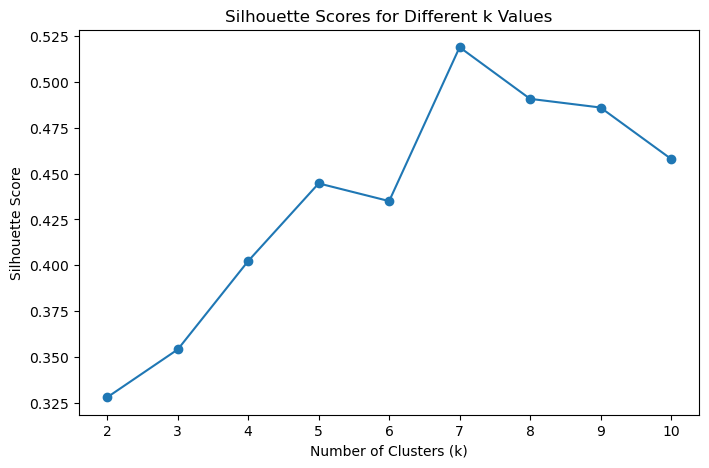

In [242]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score

# Silhouette Score: Cluster Validation

# Create a list to store k value scores
silhouette_scores = []

# Set a range to evaluate different k values
K = range(2, 11)

# Evaluate k values at different intervals
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)
    
# Visualize the k slhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(K)
plt.show()


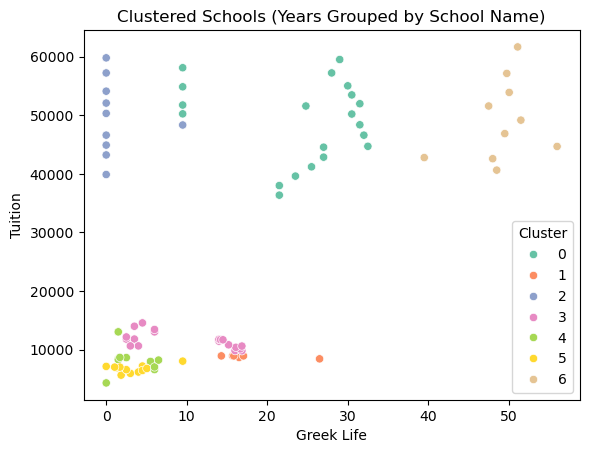

Cluster 0:
['SMU', 'SMU', 'SMU', 'SMU', 'SMU', 'SMU', 'SMU', 'SMU', 'SMU', 'TCU', 'Baylor', 'Baylor', 'Baylor', 'Baylor', 'Baylor', 'Baylor', 'Baylor', 'Baylor', 'Baylor', 'Baylor']


Cluster 1:
['TTU', 'TTU', 'TTU', 'TTU', 'TTU', 'TTU']


Cluster 2:
['Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice']


Cluster 3:
['UTD', 'UTD', 'UTD', 'UTD', 'UTD', 'UTD', 'UTD', 'UTD', 'UTD', 'UTD', 'UT', 'UT', 'UT', 'UT', 'UT', 'UT', 'UT', 'UT', 'UT', 'UT']


Cluster 4:
['UNT', 'UNT', 'UNT', 'UNT', 'UNT', 'UNT', 'UNT', 'UNT', 'TTU', 'TTU', 'TTU']


Cluster 5:
['UNT', 'UNT', 'TWU', 'TWU', 'TWU', 'TWU', 'TWU', 'TWU', 'TWU', 'TWU', 'TWU', 'TWU', 'TTU']


Cluster 6:
['SMU', 'TCU', 'TCU', 'TCU', 'TCU', 'TCU', 'TCU', 'TCU', 'TCU', 'TCU']




In [258]:


# Unsupervised Machine Learning: K-Means Clustering

# Select features for clustering
X = clean_df[['enroll_rate', 'tuition', 'verbal75', 'math75', 'greek']]

# Scale the select features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the KMeans model on the scaled data and assign labels
kmeans = KMeans(n_clusters=7)
clean_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the school clusters
sns.scatterplot(x='greek', y='tuition', hue='Cluster', data=clean_df, palette='Set2')
plt.title('Clustered Schools (Years Grouped by School Name)')
plt.xlabel('Greek Life')
plt.ylabel('Tuition')
plt.show()

# Loop through each cluster and display the schools that belong to them
for cluster in sorted(clean_df['Cluster'].unique()):
    print(f"Cluster {cluster}:")
    print(clean_df[clean_df['Cluster'] == cluster]['school'].tolist())
    print("\n")

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Supervised Machine Learning: Decision Tree

# Create target features and variable of liked school (binary - liked/not liked)
df['liked_school'] = (df['admit_rate'] < 0.5) & (df['tuition'] > 20000) & (df['greek'] > 0.3)
df['liked_school'] = df['liked_school'].astype(int)

features = ['admit_rate', 'enroll_rate', 'tuition', 'verbal75', 'math75', 'greek']
target = 'liked_school'

X = df[features]
y = df[target]

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize tree classifier and fit the model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Create predictions and display performance metrics
y_pred = dt_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Add predictions and display the schools with the highest prob. of liked_school
test_indices = X_test.index
df.loc[test_indices, 'predicted_liked'] = y_pred

liked_schools = df[df['predicted_liked'] == 1]
liked_school_names = liked_schools['school']
print("Liked Schools:")
print(liked_school_names)


Confusion Matrix:
[[14  0]
 [ 0  4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


Accuracy Score:
1.0
Liked Schools:
35       SMU
40       TCU
44       TCU
65    Baylor
Name: school, dtype: object


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


# Supervised Machine Learning: Decision Tree

# Create target features and variable of liked school (binary - liked/not liked)
df['liked_school'] = (df['admit_rate'] < 0.5) & (df['tuition'] > 20000) & (df['greek'] > 0.3)
df['liked_school'] = df['liked_school'].astype(int)

features = ['admit_rate', 'enroll_rate', 'tuition', 'faculty', 'gradRate', 'verbal75', 'math75', 'greek']
target = 'liked_school'

X = df[features]
y = df[target]

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize tree classifier and fit the model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Create predictions and display performance metrics
y_pred = dt_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Add predictions and display the schools with the highest prob. of liked_school
test_indices = X_test.index
df.loc[test_indices, 'predicted_liked'] = y_pred

liked_schools = df[df['predicted_liked'] == 1]
liked_school_names = liked_schools['school']
print("Liked Schools:")
print(liked_school_names)


Confusion Matrix:
[[14  0]
 [ 0  4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


Accuracy Score:
1.0
Liked Schools:
35       SMU
40       TCU
44       TCU
65    Baylor
Name: school, dtype: object


In [261]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np


# Bootstrap Method: Decision Tree Validation

# Set the total number of bootstrap occurances
n_iterations = 1000 
# Create a list to store OOB scores of each occurance
oob_scores = []  

# Create bootstrap sample, train decision tree, evaluate OOB data
for i in range(n_iterations):
    # Resample data X & target y
    X_resampled, y_resampled = resample(X, y, random_state=i)

    # Create DT classifier w/ a fixed random seed and train the model on resampled data
    model = DecisionTreeClassifier(random_state=i)
    model.fit(X_resampled, y_resampled)

    # Identify OOB samples
    mask = ~np.isin(np.arange(len(X)), np.where(np.array([item in X_resampled for item in X]) == True)[0])
    X_oob = X[mask]  
    y_oob = y[mask]

    # Check if OOB samples exist and make predictions
    if len(X_oob) > 0:
        y_pred = model.predict(X_oob)  
        score = accuracy_score(y_oob, y_pred)  
        oob_scores.append(score) 

# Display the average out-of-bag accuracy 
mean_oob_score = np.mean(oob_scores) * 100  
print(f'Mean Out-of-Bag Accuracy: {mean_oob_score.round(3)}%') 


Mean Out-of-Bag Accuracy: 96.132%


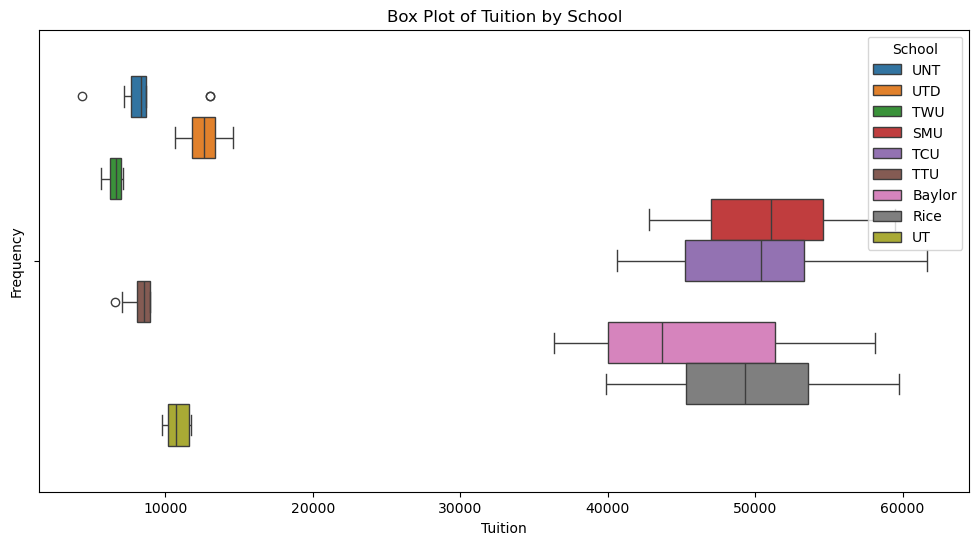

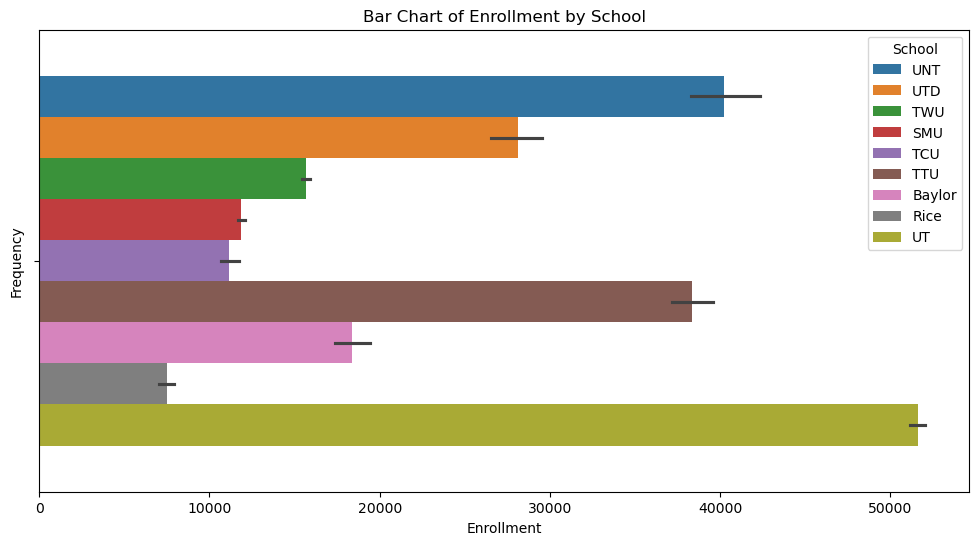

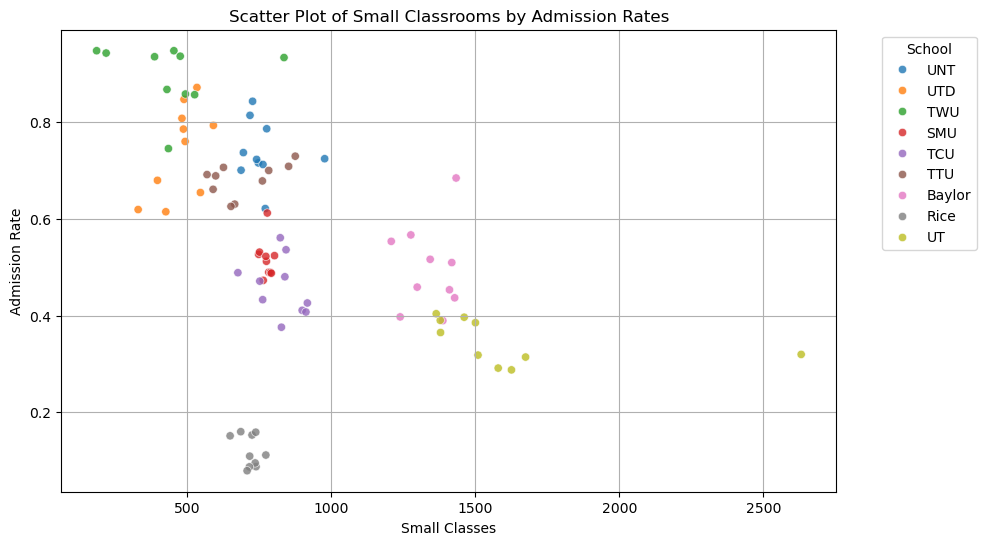

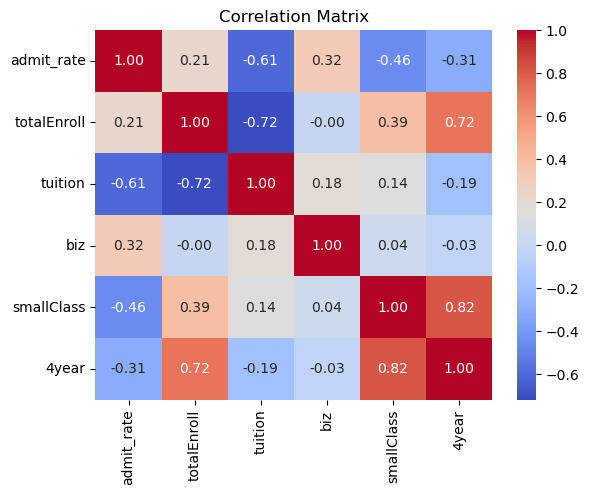

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot: Distribution of Tuition
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df, x='tuition', hue='school',  palette='tab10')
plt.title('Box Plot of Tuition by School')
plt.xlabel('Tuition')
plt.ylabel('Frequency')
plt.legend(title='School', loc='upper right')
plt.show()

# Bar Chart: Frequency of Total Enrollment
plt.figure(figsize=(12, 6))
sns.barplot(data=clean_df, x='totalEnroll', hue='school',  palette='tab10')
plt.title('Bar Chart of Enrollment by School')
plt.xlabel('Enrollment')
plt.ylabel('Frequency')
plt.legend(title='School', loc='upper right')
plt.show()

# Scatter Plot: Small Classrooms vs. Admission Rates
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['smallClass'], y=df['admit_rate'], hue=df['school'], alpha=0.8)
plt.title('Scatter Plot of Small Classrooms by Admission Rates')
plt.xlabel('Small Classes')
plt.ylabel('Admission Rate')
plt.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Heatmap: Matrix of Target Features
corr_matrix = df[['admit_rate', 'totalEnroll', 'tuition', 'biz', 'smallClass', '4year']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [343]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


# Supervised Machine Learning: Decision Tree

# Create target features and variable of liked school (binary - liked/not liked)
df['liked_school'] = (df['admit_rate'] > 0.5 ) & (df['tuition'] < 13034) & (df['totalEnroll'] < 17625)
df['liked_school'] = df['liked_school'].astype(int)

features = ['admit_rate', 'totalEnroll', 'tuition', 'biz', 'smallClass', '4year']
target = 'liked_school'

X = df[features]
y = df[target]

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize tree classifier and fit the model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Create predictions and display performance metrics
y_pred = dt_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Add predictions and display the schools with the highest prob. of liked_school
test_indices = X_test.index
df.loc[test_indices, 'predicted_liked'] = y_pred

liked_schools = df[df['predicted_liked'] == 1]
liked_school_names = liked_schools['school']
print("Liked Schools:")
print(liked_school_names)


Confusion Matrix:
[[15  0]
 [ 0  3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


Accuracy Score:
1.0
Liked Schools:
22    TWU
26    TWU
28    TWU
Name: school, dtype: object


In [345]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np


# Bootstrap Method: Decision Tree Validation

# Set the total number of bootstrap occurances
n_iterations = 1000 
# Create a list to store OOB scores of each occurance
oob_scores = []  

# Create bootstrap sample, train decision tree, evaluate OOB data
for i in range(n_iterations):
    # Resample data X & target y
    X_resampled, y_resampled = resample(X, y, random_state=i)

    # Create DT classifier w/ a fixed random seed and train the model on resampled data
    model = DecisionTreeClassifier(random_state=i)
    model.fit(X_resampled, y_resampled)

    # Identify OOB samples
    mask = ~np.isin(np.arange(len(X)), np.where(np.array([item in X_resampled for item in X]) == True)[0])
    X_oob = X[mask]  
    y_oob = y[mask]

    # Check if OOB samples exist and make predictions
    if len(X_oob) > 0:
        y_pred = model.predict(X_oob)  
        score = accuracy_score(y_oob, y_pred)  
        oob_scores.append(score) 

# Display the average out-of-bag accuracy 
mean_oob_score = np.mean(oob_scores) * 100  
print(f'Mean Out-of-Bag Accuracy: {mean_oob_score.round(3)}%') 

Mean Out-of-Bag Accuracy: 99.618%


school
Baylor    43693.0
Rice      49320.0
SMU       51079.0
TCU       50365.0
TTU        8550.0
TWU        6687.0
UNT        8141.5
UT        10717.0
UTD       12598.0
Name: tuition, dtype: float64


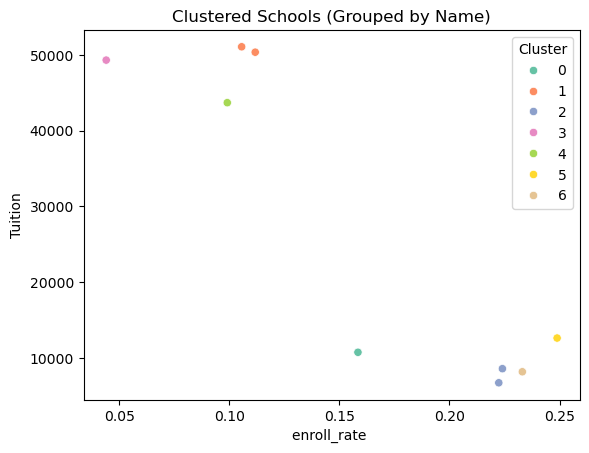

Cluster 0:
['Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice']


Cluster 1:
['TTU', 'TTU', 'TTU', 'TTU', 'TTU', 'TTU', 'TTU']


Cluster 2:
['SMU', 'SMU', 'SMU', 'SMU', 'SMU', 'SMU', 'SMU', 'SMU', 'SMU', 'SMU', 'TCU', 'TCU', 'TCU', 'TCU', 'TCU', 'TCU', 'TCU', 'TCU', 'TCU']


Cluster 3:
['TWU', 'TWU', 'TWU', 'TWU', 'TWU', 'TWU', 'TWU', 'TWU', 'TWU', 'TWU']


Cluster 4:
['UT', 'UT', 'UT', 'UT', 'UT', 'UT', 'UT', 'UT', 'UT', 'UT']


Cluster 5:
['TCU', 'Baylor', 'Baylor', 'Baylor', 'Baylor', 'Baylor', 'Baylor', 'Baylor', 'Baylor', 'Baylor', 'Baylor']


Cluster 6:
['UNT', 'UNT', 'UNT', 'UNT', 'UNT', 'UNT', 'UNT', 'UNT', 'UNT', 'UNT', 'UTD', 'UTD', 'UTD', 'UTD', 'UTD', 'UTD', 'UTD', 'UTD', 'UTD', 'UTD', 'TTU', 'TTU', 'TTU']




In [228]:
# Group by 'school_name' and aggregate numeric features
grouped_df = df.groupby('school').median()  # Or use .sum(), .median(), etc.
print(grouped_df['tuition'])
# Select features for clustering
X = grouped_df[['tuition', 'enroll_rate']]

# Scale and apply clustering as before
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=7)
grouped_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize or analyze the clusters
sns.scatterplot(x='enroll_rate', y='tuition', hue='Cluster', data=grouped_df, palette='Set2')
plt.title('Clustered Schools (Grouped by Name)')
plt.xlabel('enroll_rate ')
plt.ylabel('Tuition')
plt.show()

for cluster in sorted(grouped_df['Cluster'].unique()):
    print(f"Cluster {cluster}:")
    print(clean_df[clean_df['Cluster'] == cluster]['school'].tolist())
    print("\n")

In [204]:
# Supervised Machine Learning: Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Create target variable of liked school (binary - liked/not liked)
clean_df['liked_school'] = (clean_df['enroll_rate'] < 0.2) & (clean_df['tuition'] < 10000)
clean_df['liked_school'] = clean_df['liked_school'].astype(int)

features = ['admit_rate', 'enroll_rate', 'tuition', 'faculty', '4year']
target = 'liked_school'

X = clean_df[features]
y = clean_df[target]

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize tree classifier and fit the model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Create predictions and display performance metrics
y_pred = dt_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Add predictions and display the schools with the highest prob. of liked_school
test_indices = X_test.index
df.loc[test_indices, 'predicted_liked'] = y_pred

liked_schools = clean_df[clean_df['predicted_liked'] == 1]
liked_school_names = liked_schools['school']
print("Liked Schools:")
print(liked_school_names)


Confusion Matrix:
[[14  0]
 [ 3  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.25      0.40         4

    accuracy                           0.83        18
   macro avg       0.91      0.62      0.65        18
weighted avg       0.86      0.83      0.79        18


Accuracy Score:
0.8333333333333334
Liked Schools:
35       SMU
40       TCU
44       TCU
65    Baylor
Name: school, dtype: object


In [144]:

# Calculate the median total enrollment
median_total_enroll = df['totalEnroll'].median()

# Use the median as the threshold for defining small campuses
small_campus_threshold = median_total_enroll

# Filter schools based on the new threshold
filtered_df = df[
    (df['totalEnroll'] <= small_campus_threshold) &  # Small campus
    (df['tuition'] <= affordable_threshold) &       # Affordable
    (~df['school'].str.contains("Dallas", case=False))  # Exclude Dallas schools
]

# Sort the filtered DataFrame by a relevant column (e.g., 'tuition' or 'totalEnroll')
sorted_filtered_df = filtered_df.sort_values(by='totalEnroll')

# Select the top 4 schools
top_four_schools = sorted_filtered_df.head(4)

# Display the result
print(f"Small campus threshold (median totalEnroll): {small_campus_threshold}")
print(top_four_schools[['school', 'totalEnroll', 'tuition', 'admit_rate', 'enroll_rate']])


Small campus threshold (median totalEnroll): 17625.0
   school  totalEnroll  tuition  admit_rate  enroll_rate
20    TWU        15070   5650.0    0.948149     0.194014
21    TWU        15286   5950.0    0.745599     0.242666
23    TWU        15472   6450.0    0.857143     0.227554
24    TWU        15520   6585.0    0.867994     0.217217
